# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Import dependencies (there are a lot), including new citipy referenced in instructions
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
from api_keys import weather_api_key
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy


## Generate Cities List

In [48]:
# Test citipy based on instructions found while googling
city_test = citipy.nearest_city(32.99, -90.21)
print(city_test.city_name)
print(city_test.country_code)

yazoo city
us


In [115]:
# Need a list of 500 random cities based on GPS coordinates
# Lat is -90 to 90
# Lon is -180 to 180

# Set up lists of 500 unique lats and longs
lat_set = pd.DataFrame(np.arange(-90,90,0.1))
lon_set = pd.DataFrame(np.arange(-180,180,0.2))

lats = lat_set.sample(600)
lons = lon_set.sample(600)

# Check to make sure all unique
print(lats.nunique())
print(lons.nunique())

# Combine into one df
coordinates = list(zip(lats[0],lons[0]))
coordinates_df = pd.DataFrame(coordinates)
coordinates_df.head()

0    600
dtype: int64
0    600
dtype: int64


,0,1
0,54.6,-35.6
1,-11.6,-20.8
2,-6.4,-21.2
3,85.4,-68.6
4,-71.1,6.6


In [116]:
# Identify nearest city for each set of coordinates
cities = []

for row in coordinates:
    city = citipy.nearest_city(row[0], row[1]).city_name
    cities.append(city)
        
print(cities)

['nanortalik', 'georgetown', 'georgetown', 'qaanaaq', 'hermanus', 'nanortalik', 'lukovetskiy', 'thompson', 'busselton', 'ushuaia', 'cape town', 'padang', 'birao', 'dingle', 'sistranda', 'tiksi', 'mataura', 'requena', 'samusu', 'makakilo city', 'vaini', 'new norfolk', 'quang ngai', 'sao miguel do tapuio', 'hithadhoo', 'eydhafushi', 'ushuaia', 'buin', 'thompson', 'rikitea', 'hobart', 'hilo', 'puerto ayora', 'belushya guba', 'bay roberts', 'kapaa', 'ushuaia', 'margate', 'smithers', 'coihaique', 'kodiak', 'illoqqortoormiut', 'bethel', 'khatanga', 'hellvik', 'busselton', 'nome', 'grindavik', 'airai', 'codrington', 'port alfred', 'nouadhibou', 'abha', 'chokurdakh', 'hasaki', 'catuday', 'cape town', 'chokurdakh', 'port elizabeth', 'pevek', 'rikitea', 'fort nelson', 'tuktoyaktuk', 'ushuaia', 'gao', 'punta arenas', 'port alfred', 'bluff', 'saint george', 'kaniama', 'severo-kurilsk', 'sola', 'mataura', 'hilo', 'yellowknife', 'comrie', 'atuona', 'swan river', 'pokhara', 'tondela', 'nikolskoye', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [117]:
# Set dataframes for desired data

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
city_lat = []
city_lon = []
country = []
datetime = []

url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial&q="

In [118]:
# Check format of incoming data

test_data = requests.get(url+"london").json()
pprint(test_data)

{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1621746761,
 'id': 2643743,
 'main': {'feels_like': 38.14,
          'humidity': 87,
          'pressure': 1010,
          'temp': 42.03,
          'temp_max': 44.26,
          'temp_min': 39.29},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2019646,
         'sunrise': 1621742276,
         'sunset': 1621799814,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 225, 'gust': 19.24, 'speed': 6.04}}


In [119]:
# Receive data from OpenWeatherMap
counter = 0

print("Beginning Data Retrival")
print("-----------------------------")


for city in cities:
    response = requests.get(url+city).json()
    if response["cod"]==200:
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        datetime.append(response["dt"])
        print(f"Processing Record {counter} | {city}")
        counter += 1
    else:
        print(f"City not found! Skipping to next...")

print(f"--------------------")
print(f"Data Retrieval Complete")
print(f"--------------------")


Beginning Data Retrival
-----------------------------
Processing Record 0 | nanortalik
Processing Record 1 | georgetown
Processing Record 2 | georgetown
Processing Record 3 | qaanaaq
Processing Record 4 | hermanus
Processing Record 5 | nanortalik
Processing Record 6 | lukovetskiy
Processing Record 7 | thompson
Processing Record 8 | busselton
Processing Record 9 | ushuaia
Processing Record 10 | cape town
Processing Record 11 | padang
Processing Record 12 | birao
Processing Record 13 | dingle
Processing Record 14 | sistranda
Processing Record 15 | tiksi
Processing Record 16 | mataura
Processing Record 17 | requena
City not found! Skipping to next...
Processing Record 18 | makakilo city
Processing Record 19 | vaini
Processing Record 20 | new norfolk
Processing Record 21 | quang ngai
Processing Record 22 | sao miguel do tapuio
Processing Record 23 | hithadhoo
Processing Record 24 | eydhafushi
Processing Record 25 | ushuaia
Processing Record 26 | buin
Processing Record 27 | thompson
Process

Processing Record 229 | cherskiy
City not found! Skipping to next...
Processing Record 230 | aleksandrov gay
City not found! Skipping to next...
Processing Record 231 | chuy
Processing Record 232 | luderitz
Processing Record 233 | turbat
Processing Record 234 | lufilufi
Processing Record 235 | kirakira
Processing Record 236 | avarua
Processing Record 237 | punta arenas
Processing Record 238 | tuktoyaktuk
Processing Record 239 | atuona
Processing Record 240 | tiarei
Processing Record 241 | alofi
Processing Record 242 | ponta do sol
City not found! Skipping to next...
City not found! Skipping to next...
Processing Record 243 | quatre cocos
Processing Record 244 | hilo
Processing Record 245 | flinders
Processing Record 246 | hermanus
Processing Record 247 | hermanus
Processing Record 248 | samana
Processing Record 249 | vestmannaeyjar
Processing Record 250 | vaini
Processing Record 251 | mar del plata
Processing Record 252 | ribeira grande
Processing Record 253 | kapaa
Processing Record 2

City not found! Skipping to next...
Processing Record 452 | kaitangata
City not found! Skipping to next...
Processing Record 453 | srednekolymsk
Processing Record 454 | beneditinos
Processing Record 455 | cherskiy
Processing Record 456 | mount isa
Processing Record 457 | bluff
Processing Record 458 | vaini
Processing Record 459 | karratha
Processing Record 460 | kavaratti
Processing Record 461 | cayenne
Processing Record 462 | rikitea
Processing Record 463 | punta arenas
Processing Record 464 | hilo
Processing Record 465 | luderitz
Processing Record 466 | cockburn town
Processing Record 467 | ushuaia
Processing Record 468 | khatanga
Processing Record 469 | port augusta
Processing Record 470 | upernavik
Processing Record 471 | lorengau
Processing Record 472 | busselton
Processing Record 473 | ust-nera
Processing Record 474 | mayo
Processing Record 475 | dunda
Processing Record 476 | zhigansk
Processing Record 477 | ushuaia
Processing Record 478 | cape town
Processing Record 479 | calabo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [122]:
# Create DataFrame
data_df = pd.DataFrame({"City": city_name,
"Lat":city_lat,
"Long":city_lon,
"Max Temp":max_temp,
"Humidity":humidity,
"Cloudiness":cloudiness,
"Wind Speed":wind_speed,
"Country":country,
"Datetime":datetime})
data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Datetime
0,Nanortalik,60.1432,-45.2371,33.69,69,100,1.30,GL,1621747565
1,George Town,5.4112,100.3354,91.35,66,20,8.05,MY,1621747389
2,George Town,5.4112,100.3354,91.35,66,20,8.05,MY,1621747389
3,Qaanaaq,77.4840,-69.3632,18.14,76,82,6.26,GL,1621747357
4,Hermanus,-34.4187,19.2345,59.90,50,32,7.65,ZA,1621747365


In [125]:
# Export csv

data_df.to_csv("weather_data.csv",index=False,header=True)

data_df.count()

City          554
Lat           554
Long          554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Datetime      554
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [137]:
# Drop cities with humidity over 100%
low_humidity = data_df.loc[data_df["Humidity"]<=100,:]
low_humidity.count()

City          554
Lat           554
Long          554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Datetime      554
dtype: int64

In [139]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = data_df.loc[data_df["Humidity"]>100,:]
high_humidity.count()

City          0
Lat           0
Long          0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Datetime      0
dtype: int64

In [140]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#N/A as all of my data is 100% or below

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

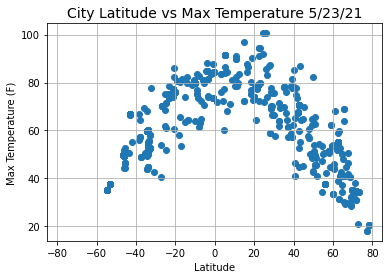

<Figure size 432x288 with 0 Axes>

In [156]:
temp_plot = plt.scatter(data_df["Lat"],data_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature 5/23/21",size=14)
plt.xlim(-85,85)
plt.grid()

plt.show(temp_plot)
plt.savefig("Lat_Temp.png")

## Latitude vs. Humidity Plot

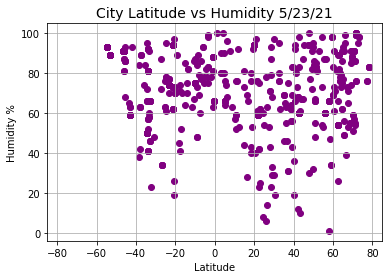

<Figure size 432x288 with 0 Axes>

In [157]:
humidity_plot = plt.scatter(data_df["Lat"],data_df["Humidity"],facecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity 5/23/21",size=14)
plt.xlim(-85,85)
plt.grid()

plt.show(temp_plot)
plt.savefig("Lat_Humidity.png")

## Latitude vs. Cloudiness Plot

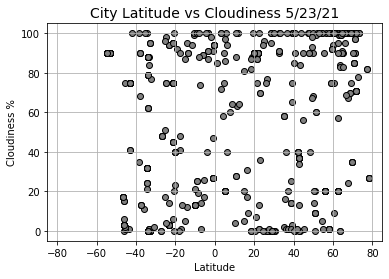

<Figure size 432x288 with 0 Axes>

In [158]:
cloud_plot = plt.scatter(data_df["Lat"],data_df["Cloudiness"],facecolors="gray",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness 5/23/21",size=14)
plt.xlim(-85,85)
plt.grid()

plt.show(temp_plot)
plt.savefig("Lat_Cloudiness.png")

## Latitude vs. Wind Speed Plot

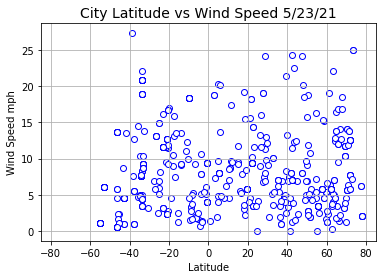

<Figure size 432x288 with 0 Axes>

In [159]:
wind_plot = plt.scatter(data_df["Lat"],data_df["Wind Speed"],facecolors="white",edgecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("City Latitude vs Wind Speed 5/23/21",size=14)
plt.xlim(-85,85)
plt.grid()

plt.show(temp_plot)
plt.savefig("Lat_Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


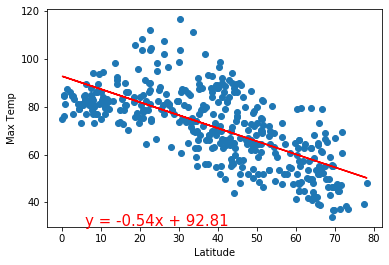

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


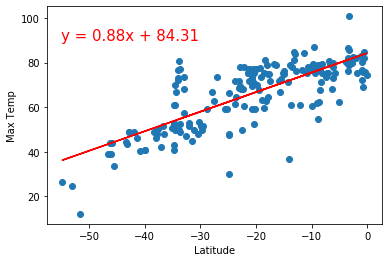

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


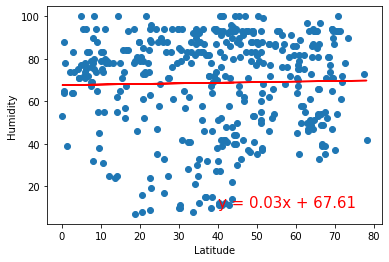

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


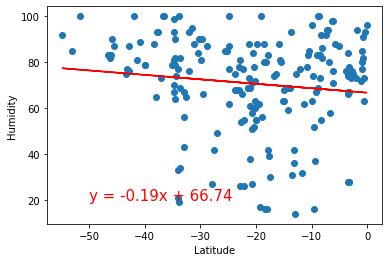

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


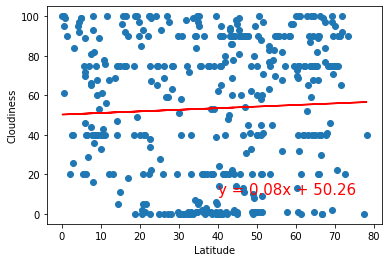

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


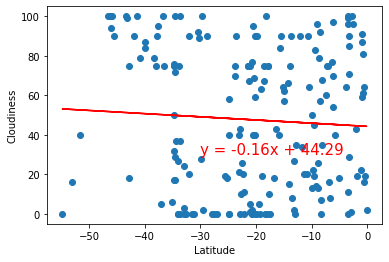

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


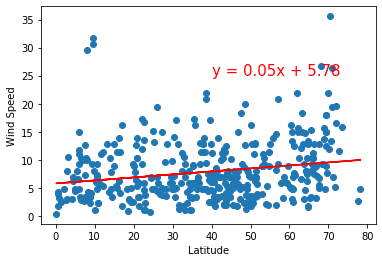

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


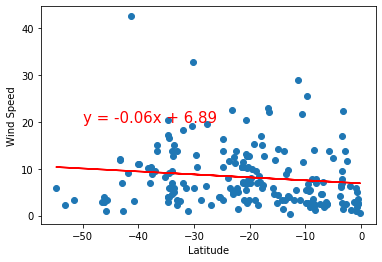